# Parcial mid

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
from numpy import isnan
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import plotly.express as px
from scipy.stats import randint
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import SVG
import os                               
from pprint import pprint

# Primera y segunda fase

**Preprocesamiento**

In [2]:
dfOrig = pd.read_csv('datasets/NA_fullTrain.csv')
df = dfOrig.copy()
df1=dfOrig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21113 entries, 0 to 21112
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              21113 non-null  int64  
 1   age             20217 non-null  float64
 2   workclass       20161 non-null  object 
 3   fnlwgt          20140 non-null  float64
 4   education       20149 non-null  object 
 5   education-num   20196 non-null  float64
 6   marital-status  20126 non-null  object 
 7   occupation      20207 non-null  object 
 8   relationship    20190 non-null  object 
 9   race            20116 non-null  object 
 10  sex             20195 non-null  object 
 11  capital-gain    20201 non-null  float64
 12  capital-loss    20235 non-null  float64
 13  hours-per-week  20165 non-null  float64
 14  native-country  20087 non-null  object 
 15  income          21113 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 2.6+ MB


In [3]:
df.head(29)

Id   age         workclass    fnlwgt     education  education-num  \
0   15977  44.0           Private  222978.0       HS-grad            9.0   
1   13574  32.0           Private   83253.0  Some-college           10.0   
2   23210  30.0         Local-gov  327825.0       HS-grad            9.0   
3    9284  23.0           Private  109952.0  Some-college           10.0   
4    8841  54.0         Local-gov  204325.0  Some-college           10.0   
5    7734  21.0           Private   70261.0  Some-college            NaN   
6     473  30.0               NaN  303990.0       HS-grad            9.0   
7    5923  42.0           Private  110028.0       HS-grad            9.0   
8    7095  37.0  Self-emp-not-inc   24106.0       HS-grad            9.0   
9    9689  56.0  Self-emp-not-inc  125147.0          10th            6.0   
10   6528  63.0  Self-emp-not-inc  125178.0     Bachelors           13.0   
11  17385   NaN         State-gov  119421.0       HS-grad            9.0   
12  24657  24.0           Private  283092.0          11th            7.0   
13  29179   NaN           Private  284317.0  Some-college           10.0   
14  26539  59.0         State-gov  159472.0           9th            5.0   
15   9797  47.0      Self-emp-inc  168191.0  Some-college           10.0   
16   2781  61.0           Private  183735.0  Some-college           10.0   
17  17582  48.0      Self-emp-inc       NaN  Some-college           10.0   
18  12433  41.0           Private  203761.0     Bachelors           13.0   
19  18179  26.0           Private  152452.0     Bachelors           13.0   
20   6435  40.0           Private  205175.0       HS-grad            9.0   
21  30121  37.0           Private  356824.0           NaN            9.0   
22  17073  43.0               NaN   72887.0     Bachelors           13.0   
23     58  41.0           Private  147372.0       HS-grad            9.0   
24   9957  39.0           Private  149943.0       Masters           14.0   
25  23641  55.0         State-gov  296991.0   Prof-school           15.0   
26  22271  56.0               NaN   66356.0  Some-college           10.0   
27   9899  65.0           Private  243569.0  Some-college           10.0   
28  25158  55.0           Private  171467.0       HS-grad            9.0   

           marital-status         occupation   relationship  \
0                Divorced              Sales  Not-in-family   
1      Married-civ-spouse   Transport-moving        Husband   
2                Divorced    Protective-serv      Own-child   
3      Married-civ-spouse                NaN        Husband   
4      Married-civ-spouse    Protective-serv            NaN   
5           Never-married      Other-service      Own-child   
6           Never-married   Transport-moving  Not-in-family   
7      Married-civ-spouse       Craft-repair        Husband   
8                     NaN       Tech-support        Husband   
9      Married-civ-spouse   Transport-moving        Husband   
10     Married-civ-spouse     Prof-specialty        Husband   
11              Separated       Adm-clerical      Unmarried   
12          Never-married                NaN  Not-in-family   
13          Never-married      Other-service      Own-child   
14     Married-civ-spouse   Transport-moving        Husband   
15     Married-civ-spouse       Craft-repair        Husband   
16     Married-civ-spouse              Sales        Husband   
17          Never-married       Craft-repair  Not-in-family   
18     Married-civ-spouse     Prof-specialty        Husband   
19     Married-civ-spouse       Tech-support        Husband   
20                    NaN  Machine-op-inspct      Unmarried   
21              Separated       Tech-support      Unmarried   
22  Married-spouse-absent       Tech-support  Not-in-family   
23     Married-civ-spouse       Adm-clerical        Husband   
24          Never-married              Sales            NaN   
25     Married-civ-spouse     Prof-specialty        Husband   
26     Married-civ-spouse

In [4]:
df.columns=['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [5]:
num_missing = (df[df.columns] == 0).sum()
num_missing

id                    1
age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain      18503
capital_loss      19272
hours_per_week        0
native_country        0
income                0
dtype: int64

<Axes: >

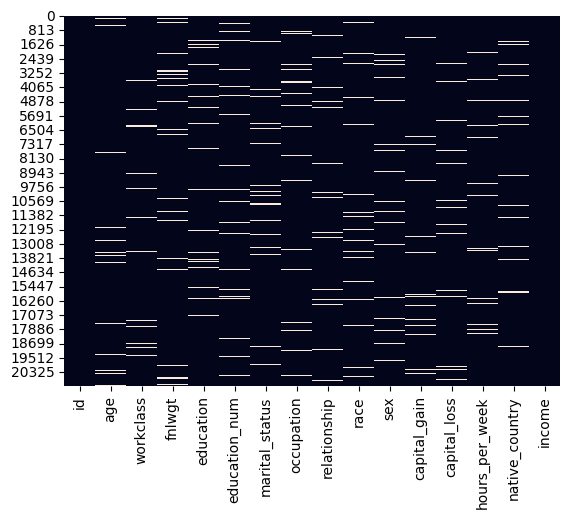

In [6]:
sns.heatmap(df.isnull(), cbar=False)

En las anteriores líneas de código vemos que hay bastantes valores faltantes, devemos calcular cuanto es el porcentaje para actuar de acuerdo a esto.

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df[missing_value_df['percent_missing']>0].sort_values(by='percent_missing',ascending=False)

percent_missing
native_country         4.859565
race                   4.722209
marital_status         4.674845
fnlwgt                 4.608535
education              4.565907
workclass              4.509070
hours_per_week         4.490125
relationship           4.371714
sex                    4.348032
education_num          4.343296
capital_gain           4.319614
occupation             4.291195
age                    4.243831
capital_loss           4.158575

Podemos ver que los porcentajes son entre el 4 al 5 %, por lo cual, es posible manejarlo mediante metodos de imputacion.

In [8]:
df['native_country'].fillna(statistics.mode(df['native_country']),inplace=True)
df['workclass'].fillna(statistics.mode(df['workclass']),inplace=True)
df['education'].fillna(statistics.mode(df['education']),inplace=True)
df['education_num'].fillna(statistics.mode(df['education_num']),inplace=True)
df['marital_status'].fillna(statistics.mode(df['marital_status']),inplace=True)
df['occupation'].fillna(statistics.mode(df['occupation']),inplace=True)
df['relationship'].fillna(statistics.mode(df['relationship']),inplace=True)
df['sex'].fillna(statistics.mode(df['sex']),inplace=True)
df['race'].fillna(statistics.mode(df['race']),inplace=True)

# count the number of NaN values in each column
print("Valores perdidos en normalized_losses: " + str(df.isnull().sum()))


Valores perdidos en normalized_losses: id                  0
age               896
workclass           0
fnlwgt            973
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain      912
capital_loss      878
hours_per_week    948
native_country      0
income              0
dtype: int64


In [9]:
imputer =KNNImputer(n_neighbors=5, weights="uniform")
# transform the dataset
imputer.fit(df[["age"]])
df["age"]= imputer.transform(df[["age"]])
imputer.fit(df[["fnlwgt"]])
df["fnlwgt"]= imputer.transform(df[["fnlwgt"]])
imputer.fit(df[["capital_gain"]])
df["capital_gain"]= imputer.transform(df[["capital_gain"]])
imputer.fit(df[["capital_loss"]])
df["capital_loss"]= imputer.transform(df[["capital_loss"]])
imputer.fit(df[["hours_per_week"]])
df["hours_per_week"]= imputer.transform(df[["hours_per_week"]])
# count the number of NaN values in each column
print("Valores perdidos en normalized_losses: " + str(df.isnull().sum()))

Valores perdidos en normalized_losses: id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


<Axes: >

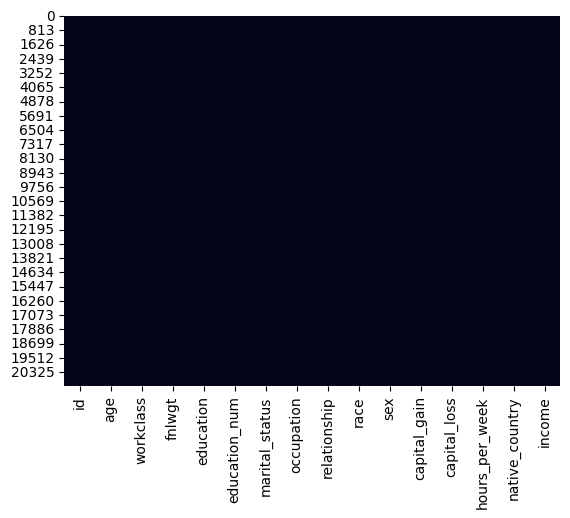

In [10]:
sns.heatmap(df.isnull(), cbar=False)

In [11]:
df.describe()

id           age        fnlwgt  education_num  capital_gain  \
count  21113.000000  21113.000000  2.111300e+04   21113.000000  21113.000000   
mean   16244.006489     38.509423  1.894323e+05      10.057311   1099.218653   
std     9371.085220     12.874026  1.032893e+05       2.507196   7258.590439   
min        0.000000     17.000000  1.376900e+04       1.000000      0.000000   
25%     8151.000000     28.000000  1.197040e+05       9.000000      0.000000   
50%    16225.000000     38.000000  1.830960e+05      10.000000      0.000000   
75%    24346.000000     47.000000  2.325770e+05      12.000000      0.000000   
max    32557.000000     90.000000  1.484705e+06      16.000000  99999.000000   

       capital_loss  hours_per_week  
count  21113.000000    21113.000000  
mean      88.897208       40.960972  
std      396.543535       11.566730  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     3770.000000       99.000000

<Axes: >

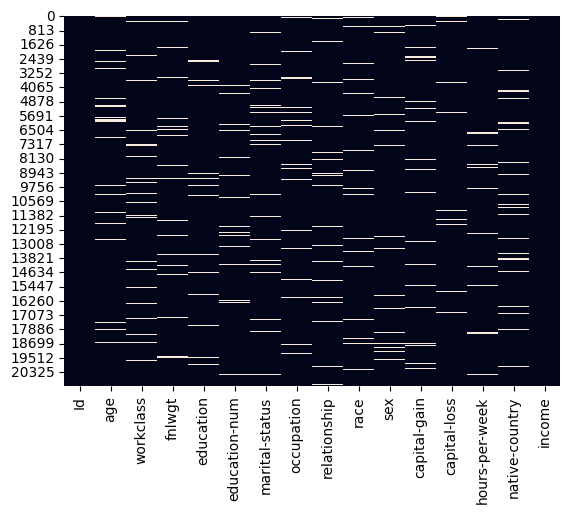

In [12]:
sns.heatmap(df1.isnull(), cbar=False)

In [13]:
df1.describe()

Id           age        fnlwgt  education-num  capital-gain  \
count  21113.000000  20217.000000  2.014000e+04   20196.000000  20201.000000   
mean   16244.006489     38.509423  1.894323e+05      10.105318   1099.218653   
std     9371.085220     13.156230  1.057551e+05       2.553115   7420.638858   
min        0.000000     17.000000  1.376900e+04       1.000000      0.000000   
25%     8151.000000     28.000000  1.171668e+05       9.000000      0.000000   
50%    16225.000000     37.000000  1.780135e+05      10.000000      0.000000   
75%    24346.000000     47.000000  2.368355e+05      12.000000      0.000000   
max    32557.000000     90.000000  1.484705e+06      16.000000  99999.000000   

       capital-loss  hours-per-week  
count  20235.000000    20165.000000  
mean      88.897208       40.960972  
std      405.055646       11.835509  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     3770.000000       99.000000

**DECISION TREE**

In [14]:
x=df.drop('income', axis=1)
y=df['income']


In [15]:
x = pd.get_dummies(x, drop_first=True)
x=x.drop(['native_country_Scotland','native_country_Holand-Netherlands'],axis=1)

In [16]:
x

id   age         fnlwgt  education_num  capital_gain  capital_loss  \
0      15977  44.0  222978.000000            9.0           0.0        1504.0   
1      13574  32.0   83253.000000           10.0           0.0           0.0   
2      23210  30.0  327825.000000            9.0           0.0           0.0   
3       9284  23.0  109952.000000           10.0           0.0           0.0   
4       8841  54.0  204325.000000           10.0           0.0           0.0   
...      ...   ...            ...            ...           ...           ...   
21108  14169  66.0  376506.000000           16.0        3273.0           0.0   
21109  21206  50.0  158680.000000           14.0           0.0           0.0   
21110  10646  50.0   72351.000000           13.0           0.0           0.0   
21111  11687  49.0  189432.333366           13.0           0.0           0.0   
21112   2976  34.0  182177.000000            9.0        3325.0           0.0   

       hours_per_week  workclass_Local-gov  workclass_Private  \
0                40.0                False               True   
1                60.0                False               True   
2                32.0                 True              False   
3                60.0                False               True   
4                52.0                 True              False   
...               ...                  ...                ...   
21108            40.0                 True              False   
21109            50.0                False               True   
21110            45.0                False               True   
21111            60.0                False              False   
21112            35.0                False               True   

       workclass_Self-emp-inc  ...  native_country_Poland  \
0                       False  ...                  False   
1                       False  ...                  False   
2                       False  ...                  False   
3                       False  ...                  False   
4                       False  ...                  False   
...                       ...  ...                    ...   
21108                   False  ...                  False   
21109                   False  ...                  False   
21110                   False  ...                  False   
21111                   False  ...                  False   
21112                   False  ...                  False   

       native_country_Portugal  native_country_Puerto-Rico  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
21108                    False                       False   
21109                    False                       False   
21110                    False                       False   
21111                    False                       False   
21112                    False                       False   

       native_country_South  native_country_Taiwan  native_country_Thailand  \
0                     False                  False                    False   
1                     False                  False                    False   
2                     False                  False                    False   
3                     False                  False                    False   
4                     False                  False                    False   
...                     ...                    ...                      ...   
21108                 False                  False                    False   
21109                 False                  False                    False   
21110                 False                  False                    False   


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
#create One DT
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
#decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train, y_train)
predicitions = decision_tree.predict(x_test)
acc = accuracy_score(y_test, predicitions)
acc

0.8045468898010736

In [19]:
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(x_train, y_train)
            predicitions = dtree.predict(x_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc
print(best_params,best_acc)


criterion: gini, max_depth: 6, min_samples_leaf: 30 0.8441742974423745


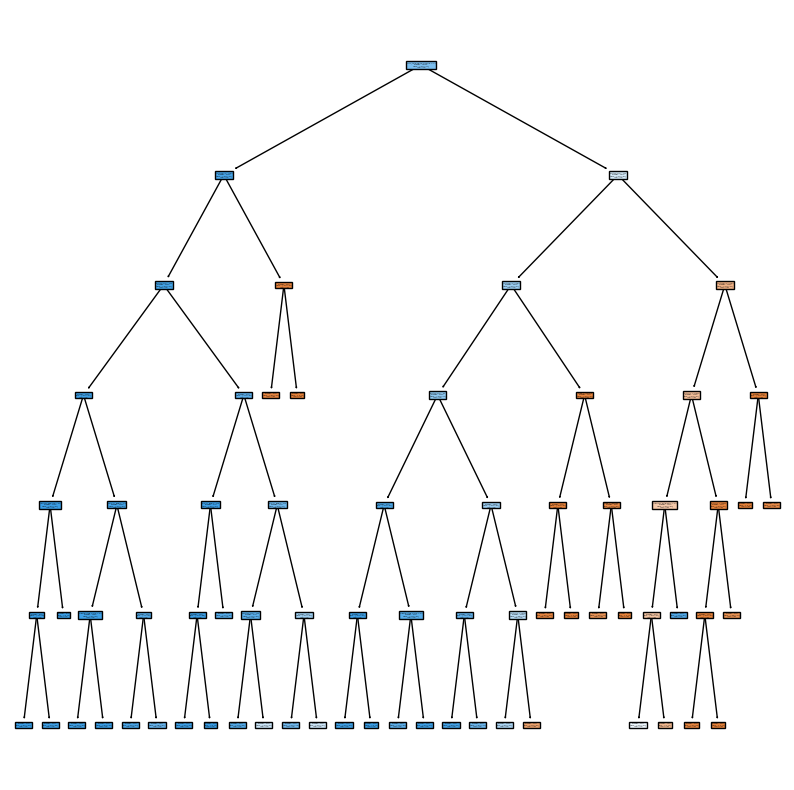

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,10)))
plot_tree(dtree,
            feature_names = x.columns,
            class_names=['High', 'Low'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

**RANDOM FOREST**

In [21]:
clf=RandomForestClassifier(n_estimators=126, random_state=40,max_depth=20,min_samples_split=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=126,
                       random_state=40)

In [22]:
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8572781812440796


**Random Search Cross Validation in Scikit_Learn (modelo escogido para el testeo)**

In [23]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 126,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}


In [24]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = randint(1, 11)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002060FCFF2C0>,
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf=RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002060FCFF2C0>,
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
base_model = RandomForestClassifier(n_estimators=1000, random_state=42)
base_model.fit(x_train, y_train)
y_pred = base_model.predict(x_test)
base_accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",base_accuracy)

Accuracy: 0.8541206188822229


In [27]:
best_random = clf_random.best_estimator_
y_pred = best_random.predict(x_test)
random_accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",random_accuracy)

Accuracy: 0.8585412061888222


In [28]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.52%.


**Grid Search with Cross Validation**

In [55]:
#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(x_test)
grid_accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",grid_accuracy)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


Accuracy: 0.8419640037890749


In [31]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -1.42%.


**Testeo**

In [32]:
dftOrig = pd.read_csv('NA_fullTest.csv')
dft = dftOrig.copy()

In [33]:
dft.columns=['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']

In [34]:
dft.head(30)

id   age         workclass    fnlwgt     education  education_num  \
0    2135  44.0           Private   81853.0       HS-grad            9.0   
1   15639  21.0               NaN  306114.0  Some-college           10.0   
2   29059  36.0           Private  186110.0  Some-college           10.0   
3   27523  30.0  Self-emp-not-inc       NaN     Assoc-voc           11.0   
4    9280  42.0               NaN  133584.0  Some-college           10.0   
5   21598  24.0           Private  291407.0       HS-grad            9.0   
6   28780  21.0         Local-gov  193130.0  Some-college            NaN   
7   13383  32.0               NaN  195447.0     Bachelors           13.0   
8   11015  35.0           Private  143058.0       HS-grad            9.0   
9    3180  30.0         Local-gov  326104.0       HS-grad            9.0   
10  12753  55.0           Private  171015.0       HS-grad            9.0   
11   1541  62.0           Private  162245.0   Prof-school           15.0   
12  24235  33.0           Private  173248.0       HS-grad            9.0   
13   4616  36.0           Private  130926.0     Bachelors           13.0   
14   8082  19.0           Private  136866.0       HS-grad            9.0   
15  32005  39.0           Private  128392.0       HS-grad            9.0   
16   7702  69.0         State-gov   34339.0       HS-grad            9.0   
17   3551  24.0           Private   69045.0  Some-college           10.0   
18   3635  26.0           Private  292353.0       7th-8th            4.0   
19  16227  54.0           Private  210736.0       HS-grad            9.0   
20   3312  26.0           Private   73689.0       HS-grad            9.0   
21  19818  20.0           Private  183594.0  Some-college           10.0   
22  22240  37.0           Private   98776.0           NaN            9.0   
23   6548  28.0         State-gov  158834.0       Masters           14.0   
24  25566  42.0         State-gov  222884.0     Bachelors           13.0   
25   7236  40.0           Private  204046.0          10th            6.0   
26   9822  25.0           Private   57635.0     Assoc-voc           11.0   
27   7609  40.0           Private  248406.0  Some-college           10.0   
28   9738  29.0           Private   81057.0  Some-college            NaN   
29  13649  20.0           Private  119215.0  Some-college           10.0   

        marital_status         occupation   relationship                race  \
0        Never-married              Sales  Not-in-family  Asian-Pac-Islander   
1        Never-married       Adm-clerical      Own-child               White   
2   Married-civ-spouse   Transport-moving        Husband               White   
3             Divorced       Craft-repair  Not-in-family               White   
4   Married-civ-spouse       Craft-repair        Husband               White   
5   Married-civ-spouse   Transport-moving        Husband               Black   
6        Never-married       Adm-clerical  Not-in-family               White   
7   Married-civ-spouse              Sales        Husband               White   
8   Married-civ-spouse  Machine-op-inspct        Husband               White   
9   Married-civ-spouse    Protective-serv        Husband                 NaN   
10             Widowed              Sales      Unmarried               White   
11  Married-civ-spouse     Prof-specialty        Husband               White   
12  Married-civ-spouse      Other-service        Husband               Black   
13            Divorced       Adm-clerical  Not-in-family               White   
14       Never-married       Craft-repair      Own-child               White   
15  Married-civ-spouse  Machine-op-inspct            NaN               White   
16  Married-civ-spouse    Protective-serv        Husband               White   
17                 NaN              Sales  Not-in-family               Black   
18  Married-civ-spouse  Machine-op-inspct        Husband               Other   
19  Married-civ-spouse       Craft-repair        H

In [35]:
num_missing = (dft[dft.columns] == 0).sum()
num_missing

id                   0
age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain      7923
capital_loss      8233
hours_per_week       0
native_country       0
dtype: int64

<Axes: >

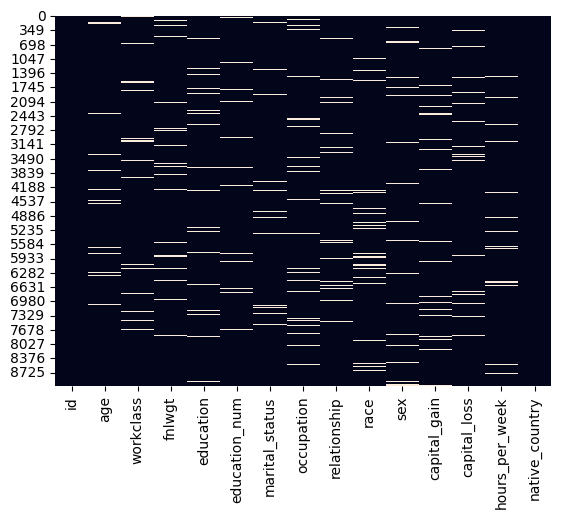

In [36]:
sns.heatmap(dft.isnull(), cbar=False)

In [37]:
percent_missing = dft.isnull().sum() * 100 / len(dft)
missing_value_dft = pd.DataFrame({'percent_missing': percent_missing})
missing_value_dft.sort_values('percent_missing', inplace=True)
missing_value_dft[missing_value_dft['percent_missing']>0].sort_values(by='percent_missing',ascending=False)

percent_missing
marital_status         4.774008
race                   4.740855
education              4.718753
fnlwgt                 4.608244
capital_loss           4.575091
capital_gain           4.497735
sex                    4.475633
workclass              4.409327
age                    4.387225
hours_per_week         4.387225
occupation             4.376174
education_num          4.343021
relationship           4.309868

In [38]:
dft['native_country'].fillna(statistics.mode(dft['native_country']),inplace=True)
dft['workclass'].fillna(statistics.mode(dft['workclass']),inplace=True)
dft['education'].fillna(statistics.mode(dft['education']),inplace=True)
dft['education_num'].fillna(statistics.mode(dft['education_num']),inplace=True)
dft['marital_status'].fillna(statistics.mode(dft['marital_status']),inplace=True)
dft['occupation'].fillna(statistics.mode(dft['occupation']),inplace=True)
dft['relationship'].fillna(statistics.mode(dft['relationship']),inplace=True)
dft['sex'].fillna(statistics.mode(dft['sex']),inplace=True)
dft['race'].fillna(statistics.mode(dft['race']),inplace=True)

# count the number of NaN values in each column
print("Valores perdidos en normalized_losses: " + str(dft.isnull().sum()))


Valores perdidos en normalized_losses: id                  0
age               397
workclass           0
fnlwgt            417
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain      407
capital_loss      414
hours_per_week    397
native_country      0
dtype: int64


In [39]:
imputer =KNNImputer(n_neighbors=5, weights="uniform")
# transform the dataset
imputer.fit(dft[["age"]])
dft["age"]= imputer.transform(dft[["age"]])
imputer.fit(dft[["fnlwgt"]])
dft["fnlwgt"]= imputer.transform(dft[["fnlwgt"]])
imputer.fit(dft[["education_num"]])
dft["education_num"]= imputer.transform(dft[["education_num"]])
imputer.fit(dft[["capital_gain"]])
dft["capital_gain"]= imputer.transform(dft[["capital_gain"]])
imputer.fit(dft[["capital_loss"]])
dft["capital_loss"]= imputer.transform(dft[["capital_loss"]])
imputer.fit(dft[["hours_per_week"]])
dft["hours_per_week"]= imputer.transform(dft[["hours_per_week"]])
# count the number of NaN values in each column
print("Valores perdidos en normalized_losses: " + str(dft.isnull().sum()))

Valores perdidos en normalized_losses: id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


<Axes: >

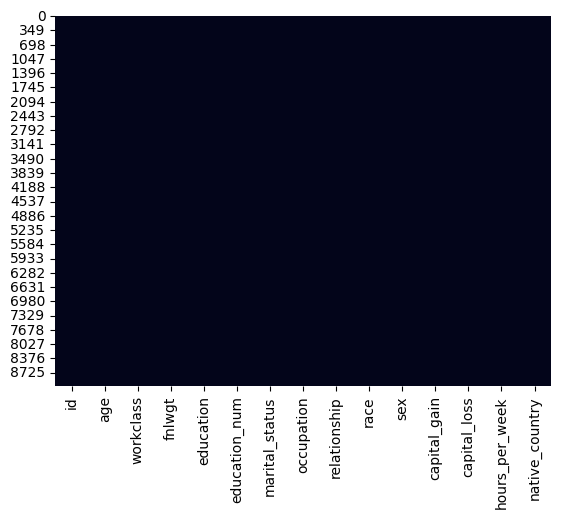

In [40]:
sns.heatmap(dft.isnull(), cbar=False)

In [41]:
dft.describe()

id          age        fnlwgt  education_num  capital_gain  \
count   9049.000000  9049.000000  9.049000e+03    9049.000000   9049.000000   
mean   16387.655984    38.300855  1.906617e+05      10.092496   1000.648808   
std     9411.826934    12.821058  1.034117e+05       2.506349   6703.228434   
min        4.000000    17.000000  1.921400e+04       1.000000      0.000000   
25%     8226.000000    28.000000  1.213080e+05       9.000000      0.000000   
50%    16436.000000    38.000000  1.835230e+05      10.000000      0.000000   
75%    24537.000000    46.000000  2.344600e+05      12.000000      0.000000   
max    32560.000000    90.000000  1.366120e+06      16.000000  99999.000000   

       capital_loss  hours_per_week  
count   9049.000000     9049.000000  
mean      87.312797       40.968331  
std      394.820211       11.997934  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [42]:
xt = pd.get_dummies(dft, drop_first=True)

In [43]:
xt

id   age         fnlwgt  education_num  capital_gain  capital_loss  \
0      2135  44.0   81853.000000            9.0           0.0      0.000000   
1     15639  21.0  306114.000000           10.0           0.0     87.312797   
2     29059  36.0  186110.000000           10.0           0.0      0.000000   
3     27523  30.0  190661.677016           11.0           0.0      0.000000   
4      9280  42.0  133584.000000           10.0           0.0      0.000000   
...     ...   ...            ...            ...           ...           ...   
9044  16826  27.0  218785.000000            9.0           0.0      0.000000   
9045  25246  54.0   36327.000000            4.0           0.0      0.000000   
9046  18980  53.0  149650.000000            9.0           0.0   2559.000000   
9047    953  18.0  177722.000000            9.0           0.0      0.000000   
9048  30925  24.0  375313.000000           10.0           0.0      0.000000   

      hours_per_week  workclass_Local-gov  workclass_Private  \
0               40.0                False               True   
1               20.0                False               True   
2               40.0                False               True   
3               49.0                False              False   
4               40.0                False               True   
...              ...                  ...                ...   
9044            40.0                False               True   
9045            50.0                False              False   
9046            48.0                False               True   
9047            20.0                False               True   
9048            40.0                False              False   

      workclass_Self-emp-inc  ...  native_country_Poland  \
0                      False  ...                  False   
1                      False  ...                  False   
2                      False  ...                  False   
3                      False  ...                  False   
4                      False  ...                  False   
...                      ...  ...                    ...   
9044                   False  ...                  False   
9045                   False  ...                  False   
9046                   False  ...                  False   
9047                   False  ...                  False   
9048                   False  ...                  False   

      native_country_Portugal  native_country_Puerto-Rico  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   
...                       ...                         ...   
9044                    False                       False   
9045                    False                       False   
9046                    False                       False   
9047                    False                       False   
9048                    False                       False   

      native_country_South  native_country_Taiwan  native_country_Thailand  \
0                    False                  False                    False   
1                    False                  False                    False   
2                    False                  False                    False   
3                    False                  False                    False   
4                    False                  False                    False   
...                    ...                    ...                      ...   
9044                 False                  False                    False   
9045                 False                  False                    False   
9046                 False                  False                    False   
9047                 False                  False        

In [44]:

y_pred = best_random.predict(xt)

In [45]:
yt=pd.DataFrame(data=y_pred,columns=['income'])

In [47]:
yt['id']=xt['id']
yt=yt[['id','income']]
yt.head(30)    

id income
0    2135    low
1   15639    low
2   29059    low
3   27523    low
4    9280    low
5   21598    low
6   28780    low
7   13383   high
8   11015    low
9    3180    low
10  12753    low
11   1541   high
12  24235    low
13   4616    low
14   8082    low
15  32005   high
16   7702    low
17   3551    low
18   3635    low
19  16227    low
20   3312    low
21  19818    low
22  22240    low
23   6548   high
24  25566    low
25   7236    low
26   9822    low
27   7609    low
28   9738    low
29  13649    low

In [48]:
#Random
yt.to_csv('randomized_prediction.csv', index=False)

In [50]:
#Grid
y_pred1 = best_grid.predict(xt)
yt1=pd.DataFrame(data=y_pred1,columns=['income'])
yt1['id']=xt['id']
yt1=yt1[['id','income']]
yt1.head(30)    


id income
0    2135    low
1   15639    low
2   29059    low
3   27523    low
4    9280    low
5   21598    low
6   28780    low
7   13383   high
8   11015    low
9    3180    low
10  12753    low
11   1541   high
12  24235    low
13   4616    low
14   8082    low
15  32005    low
16   7702    low
17   3551    low
18   3635    low
19  16227    low
20   3312    low
21  19818    low
22  22240    low
23   6548   high
24  25566    low
25   7236    low
26   9822    low
27   7609    low
28   9738    low
29  13649    low

In [51]:
yt1.to_csv('grid_prediction.csv', index=False)

In [56]:
y_pred2 = clf.predict(xt)
yt2=pd.DataFrame(data=y_pred2,columns=['income'])
yt2['id']=xt['id']
yt2=yt2[['id','income']]
yt2.head(30)  

id income
0    2135    low
1   15639    low
2   29059    low
3   27523    low
4    9280    low
5   21598    low
6   28780    low
7   13383   high
8   11015   high
9    3180   high
10  12753    low
11   1541   high
12  24235    low
13   4616    low
14   8082    low
15  32005   high
16   7702    low
17   3551    low
18   3635    low
19  16227   high
20   3312    low
21  19818    low
22  22240    low
23   6548   high
24  25566    low
25   7236    low
26   9822    low
27   7609    low
28   9738    low
29  13649    low

In [57]:
yt2.to_csv('random_forest_prediction', index=False)


# Tercera fase

### 1. Según el dataset, en qué sector se encuentran la mayoría de empleos y a qué porcentaje corresponde.

In [58]:
P1=df.groupby(['workclass'])['occupation'].count()
P1.sort_values(ascending=False)

workclass
Private             15891
Self-emp-not-inc     1634
Local-gov            1409
State-gov             825
Self-emp-inc          732
Federal-gov           614
Without-pay             8
Name: occupation, dtype: int64

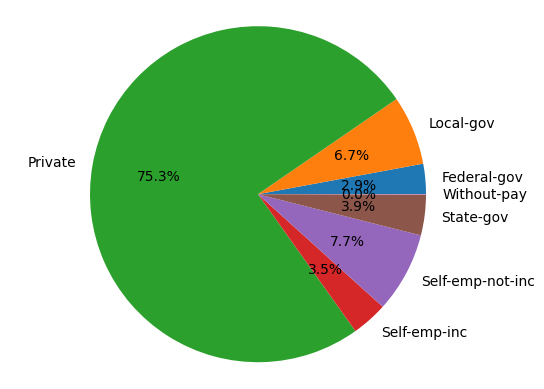

In [59]:
plt.pie(P1, labels=P1.index, shadow=False,
startangle=0, autopct='%1.1f%%',)
plt.axis('equal')
plt.show()


In [60]:
P2=df.groupby(['workclass','occupation'])['occupation'].count()
P2=pd.DataFrame(P2,columns=None)
P2=P2.rename(columns={'occupation':'count'}).reset_index()
P2

workclass        occupation  count
0   Federal-gov      Adm-clerical    193
1   Federal-gov      Armed-Forces      3
2   Federal-gov      Craft-repair     76
3   Federal-gov   Exec-managerial    108
4   Federal-gov   Farming-fishing      5
..          ...               ...    ...
74  Without-pay      Adm-clerical      2
75  Without-pay      Craft-repair      3
76  Without-pay   Farming-fishing      1
77  Without-pay     Other-service      1
78  Without-pay  Transport-moving      1

[79 rows x 3 columns]

In [61]:
fig = px.histogram(P2, x="occupation", y="count",
             color='workclass', barmode='group',
             height=400)
fig.show()  


Según las gráficas, podemos ver en el gráfico de torta que el mayor porcentaje de trabajos lo tiene el sector privado con 75,3%, además en el gráfico de barras se evidencian que cuenta con todos los trabajos y es el sector con la mayoria de personas en cada trabajo a excepción del trabajo de servicios de protección, donde el govierno local tiene la mayoría.. 

### 2. Indique la minoría de personas que tipo de formación tienen en cuanto a la secundaria, títulos universitarios y licenciatura.

In [62]:
Pr=df.groupby('race')['race'].count()
Pr=pd.DataFrame(Pr,columns=None)
Pr=Pr.rename(columns={'race':'count'}).reset_index()
Pr

race  count
0  Amer-Indian-Eskimo    196
1  Asian-Pac-Islander    600
2               Black   1831
3               Other    153
4               White  18333

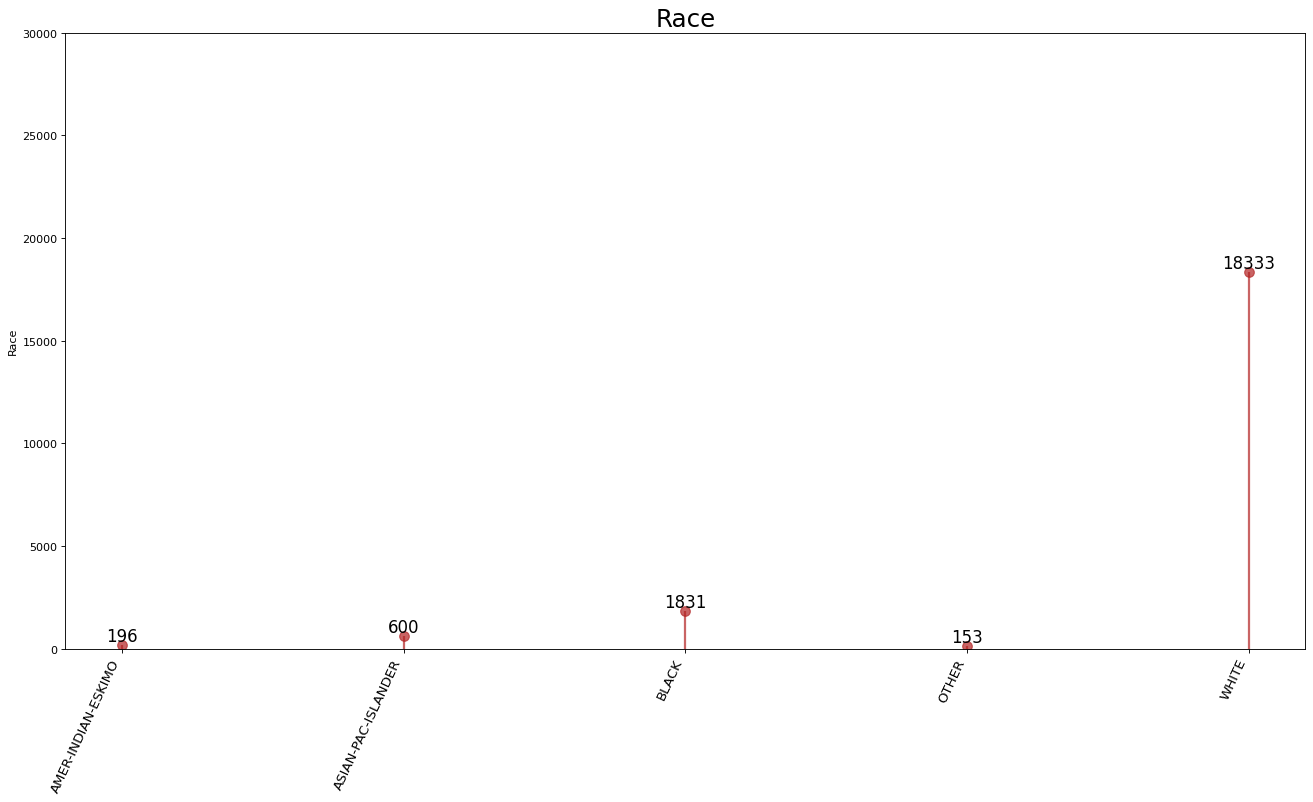

In [63]:
fig, ax = plt.subplots(figsize=(20,10), dpi= 80)
ax.vlines(x=Pr.race, ymin=0, ymax=Pr['count'],color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=Pr.race, y=Pr['count'], s=75,color='firebrick', alpha=0.7)
ax.set_title('Race', fontdict={'size':22})
ax.set_ylabel('Race')
ax.set_xticks(Pr.race)
ax.set_xticklabels(Pr.race.str.upper(),rotation=65, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30000)
for row in Pr.itertuples():
 ax.text(row.Index, row.count+.5, s=round(row.count, 2),horizontalalignment= 'center', verticalalignment='bottom',fontsize=15)
plt.show()

In [64]:
P3=df.groupby(['race','education'])['education'].count()
P3=pd.DataFrame(P3,columns=None)
P3=P3.rename(columns={'education':'count'}).reset_index()
P3

race     education  count
0   Amer-Indian-Eskimo          10th      9
1   Amer-Indian-Eskimo          11th      9
2   Amer-Indian-Eskimo          12th      3
3   Amer-Indian-Eskimo       1st-4th      3
4   Amer-Indian-Eskimo       5th-6th      2
..                 ...           ...    ...
73               White       HS-grad   6549
74               White       Masters    958
75               White     Preschool     23
76               White   Prof-school    318
77               White  Some-college   3905

[78 rows x 3 columns]

In [65]:
fig = px.histogram(P3, x="education", y="count",
             color='race', barmode='group',
             height=400)
fig.show()

In [66]:
fig = px.line(P3, x="education", y="count", color='race')
fig.show()

Teniendo en cuenta la minoría de la población, los indios americanos eskimo tienen más educación en grado de high_school, seguido por alguna universidad y pregrado.
Los asiaticos tienen más población en pregrado, high_school y alguna universidad.
La población negra tiene más nivel educativo de hich_school, seguido de alguna universidad y pregrado.
La población de otras razas, resalta con el nivel de hig_school, seguido por alguna universidad y pregrado.
La población blanca tiene más nivel educativo en el high_school, alguna universidad, y pregrado.
Al analizar las minorías podemos concluir que el nivel educativo común es el high school y algunos llegan a la universidad, dejando ver que estas poblaciones no se ven olvidadas y se educan.

### 3. ¿Qué relación encuentra entre las personas casadas y las no casadas frente a la situación laboral?.

In [67]:
condicion=[(df['marital_status']=='Divorced')|(df['marital_status']=='Never_married')|(df['marital_status']=='Separated')|(df['marital_status']=='Widowed'),(df['marital_status']=='Married_civ_spouse')|(df['marital_status']=='Married_spouse_absent')|(df['marital_status']=='Married_AF_spouse')]
values=['No_casado','Casado']
df['Estado_marital']=np.select(condicion,values)
df

id   age         workclass         fnlwgt     education  \
0      15977  44.0           Private  222978.000000       HS-grad   
1      13574  32.0           Private   83253.000000  Some-college   
2      23210  30.0         Local-gov  327825.000000       HS-grad   
3       9284  23.0           Private  109952.000000  Some-college   
4       8841  54.0         Local-gov  204325.000000  Some-college   
...      ...   ...               ...            ...           ...   
21108  14169  66.0         Local-gov  376506.000000     Doctorate   
21109  21206  50.0           Private  158680.000000       Masters   
21110  10646  50.0           Private   72351.000000     Bachelors   
21111  11687  49.0  Self-emp-not-inc  189432.333366     Bachelors   
21112   2976  34.0           Private  182177.000000       HS-grad   

       education_num      marital_status        occupation   relationship  \
0                9.0            Divorced             Sales  Not-in-family   
1               10.0  Married-civ-spouse  Transport-moving        Husband   
2                9.0            Divorced   Protective-serv      Own-child   
3               10.0  Married-civ-spouse      Craft-repair        Husband   
4               10.0  Married-civ-spouse   Protective-serv        Husband   
...              ...                 ...               ...            ...   
21108           16.0            Divorced    Prof-specialty  Not-in-family   
21109           14.0  Married-civ-spouse   Exec-managerial        Husband   
21110           13.0            Divorced      Craft-repair  Not-in-family   
21111           13.0  Married-civ-spouse      Craft-repair        Husband   
21112            9.0  Married-civ-spouse      Craft-repair  Not-in-family   

        race     sex  capital_gain  capital_loss  hours_per_week  \
0      White  Female           0.0        1504.0            40.0   
1      White    Male           0.0           0.0            60.0   
2      White  Female           0.0           0.0            32.0   
3      White    Male           0.0           0.0            60.0   
4      White    Male           0.0           0.0            52.0   
...      ...     ...           ...           ...             ...   
21108  White  Female        3273.0           0.0            40.0   
21109  White    Male           0.0           0.0            50.0   
21110  White    Male           0.0           0.0            45.0   
21111  White    Male           0.0           0.0            60.0   
21112  White    Male        3325.0           0.0            35.0   

      native_country income Estado_marital  
0      United-States    low      No_casado  
1      United-States    low              0  
2      United-States    low      No_casado  
3      United-States    low              0  
4      United-States    low              0  
...              ...    ...            ...  
21108  United-States    low      No_casado  
21109  United-States   high              0  
21110  United-States    low      No_casado  
21111  United-States   high              0  
21112  United-States    low              0  

[21113 rows x 17 columns]

In [68]:
fig = px.histogram(df, x="marital_status",color="marital_status", y="hours_per_week", barmode='group',
             height=400,histfunc="avg")
fig.show()

In [69]:
fig = px.histogram(df, x="Estado_marital",color="Estado_marital", y="hours_per_week", barmode='group',
             height=400,histfunc="avg")
fig.show()

In [70]:
P5=df.groupby(['marital_status','income'])['income'].count()
P5=pd.DataFrame(P5,columns=None)
P5=P5.rename(columns={'income':'count'}).reset_index()
fig = px.histogram(P5, x="marital_status",color="income", y="count", barmode='group',
             height=400,histfunc="sum")
fig.show()

In [71]:
P6=df.groupby(['Estado_marital','income'])['income'].count()
P6=pd.DataFrame(P6,columns=None)
P6=P6.rename(columns={'income':'count'}).reset_index()
fig = px.histogram(P6, x="Estado_marital",color="income", y="count", barmode='group',
             height=400,histfunc="sum")
fig.show()

In [72]:
fig = px.histogram(df, x="occupation", y="hours_per_week",
             color='marital_status', barmode='group',
             height=400,histfunc="avg")
fig.show()

En cuanto al análisis laboral, según los gráficos anteriores podemos evidenciar que las personas casadas tienen mayor numero de horas en el trabajo que las casadas, teniendo en cuenta que las personas no casadas incluyen divorciados, viudo y separado, haciendo una suma de horas de las personas casadas, tenemos un total de 43,25 mil, aproximadamente, superando a los no casados, tambien podemos evidenciar que las personas casadas tienen mayores ingresos que los que no están casados, evidenciando la suma de personas que tienen mayores ingresos y están casadas, podemos ver que son 4511, por el contrario las no casadas son 712, en contraste con los que tienen menores ingresos, resaltan los no casados con 9811.


### 4. ¿Cómo es la distribución de trabajo según el género y según el rango etario?:
- juventud: 14 - 26 años, 
- adultez: 27 - 59 años, 
- vejez: 60 años y más.

In [73]:
condicion=[(df['age']>=14)&(df['age']<=26),(df['age']>=27)&(df['age']<=59),(df['age']>=60)]
values=['juventud','adultez','vejez']
df['rango_etario']=np.select(condicion,values)

In [ ]:
P7=df.groupby(['rango_etario','income'])['income'].count()
P7=pd.DataFrame(P7,columns=None)
P7=P7.rename(columns={'income':'count'}).reset_index()
fig = px.histogram(P7, x="rango_etario",color="income", y="count", barmode='group',
             height=400,histfunc="sum")
fig.show()

In [74]:
fig = px.histogram(df, x="rango_etario",color="sex", y="hours_per_week", barmode='group',
             height=400,histfunc="avg")
fig.show()

In [75]:
P8=df.groupby(['rango_etario','occupation'])['occupation'].count()
P8=pd.DataFrame(P8,columns=None)
P8=P8.rename(columns={'occupation':'count'}).reset_index()
fig = px.histogram(P8, x="rango_etario",color="occupation", y="count", barmode='group',
             height=400,histfunc="avg")
fig.show()

En cuanto al rango etario, podemos hacer los siguientes análisis:
_ Según la primera gráfica podemos ver que la mayoría de personas con ingresos altos se encuentran en la adultez, con un total de 4733 personas, seguidos de los de adultez y juventud, además en cuanto a menores ingresos, también tenemos a la adultez con 10654, seguido de la juventud y la vejez.
_ En cuanto a el promedio de horas trabajadas según el genero, podemos ver que la adultez de genero masculino, trabaja más horas en promedio con 44,36 horas a la semana, seguido por la vejez y la juventud, por el contrario en el genero femenino los que más horas trabajan se encuentran en la adultez con 39,51 horas a la semana, seguido por la juventud y la adultez.
_ Por ultimo, los trabajos más destacados en la adultez son las reparaciones, seguido de los gerentes ejecutivos y especialidad profesional, en la juventud se destaca otro servicio, administracion clerical, ventas, por último, la vejez trabaja más en manager ejecutivo, reparador y especialidad profesional.


### 5. ¿Cómo es el comportamiento, en relación con la edad, en el tiempo que comienzan a trabajar las hombres versus las mujeres?

In [76]:
P4=df.groupby(['age','sex'])['sex'].count()
P4=pd.DataFrame(P4,columns=None)
P4=P4.rename(columns={'sex':'count'}).reset_index()

In [77]:
P9=df.groupby(['age','sex','income'])['income'].count()
P9=pd.DataFrame(P9,columns=None)
P9=P9.rename(columns={'income':'count'}).reset_index()

In [78]:
fig = px.line(P4, x="age", y="count", color='sex')
fig.show()

In [79]:
fig = px.histogram(df, x="age",color="sex", y="hours_per_week", barmode='group',
             height=400,histfunc="avg")
fig.show()

In [80]:
fig = px.histogram(P9, x="age",color="sex", y="count", barmode='group',
             height=400,histfunc="avg")
fig.show()

In [81]:
fig = px.histogram(P9, x="age",color="income", y="count", barmode='group',
             height=400,histfunc="avg")
fig.show()

El comportamiento de la edad de las personas es el siguiente:
_ Según el primer gráfico, podemos ver que tanto como hombres y mujeres a los 38 años es la mayor cantidad de personas que trabajan y el menor valor es a los 17 años, antes de cumlir la mayoría de edad, después de los 38 la cantidad de personas trabajando empieza a decrecer.
_ Las personas que más promedio de horas tienen en cuanto a los hombres es a los 38 años con 45 horas en promedio y comienza a decrecer el numero de horas a los 60 años, en el caso de las mujeres a los 35 años trabajan más horas con 45 horas a la semana, y decrece a los 56 años.
_ Por último, la cantidad mayor de personas con mayores ingresos son de los 43 a los 47 años.